In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Install geopandas

!pip install geopandas

     |████████████████████████████████| 931kB 9.0MB/s 
     |████████████████████████████████| 14.7MB 300kB/s 
     |████████████████████████████████| 10.9MB 58.6MB/s 


In [0]:
'''
Import all modules that are needed
'''
import geopandas as gpd
import fiona
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle
import numpy as np
from plotnine import *

In [0]:
# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
# Import final revised production time series with IJ excluded

df = pd.read_pickle('/content/drive/My Drive/Capstone1/Production/Prod_DT_Series_Final_WQuantileRank.pickle')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6393783 entries, 0 to 6393782
Data columns (total 85 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date                          datetime64[ns]
 1   API                           int64         
 2   API8                          int64         
 3   sidetrack_num                 object        
 4   well_type_cat                 category      
 5   Oper_Cur_Num                  int64         
 6   Oper_Cur_Name                 object        
 7   Oper_Hist_Num                 int64         
 8   Oper_Hist_Name                object        
 9   Well_Title                    object        
 10  Ground_Ele                    float64       
 11  Max_MD                        float64       
 12  MD                            float64       
 13  Max_TVD                       float64       
 14  TVD                           float64       
 15  TVDSS                         fl

In [0]:
# Export out file for safekeeping

# create an empty pickle file
pickle_out = open("/content/drive/My Drive/Capstone1/Production/Prod_DT_Series_Final_WQuantileRank.pickle","wb")
pickle.dump(df_mrg, pickle_out, protocol=pickle.HIGHEST_PROTOCOL)
pickle_out.close()

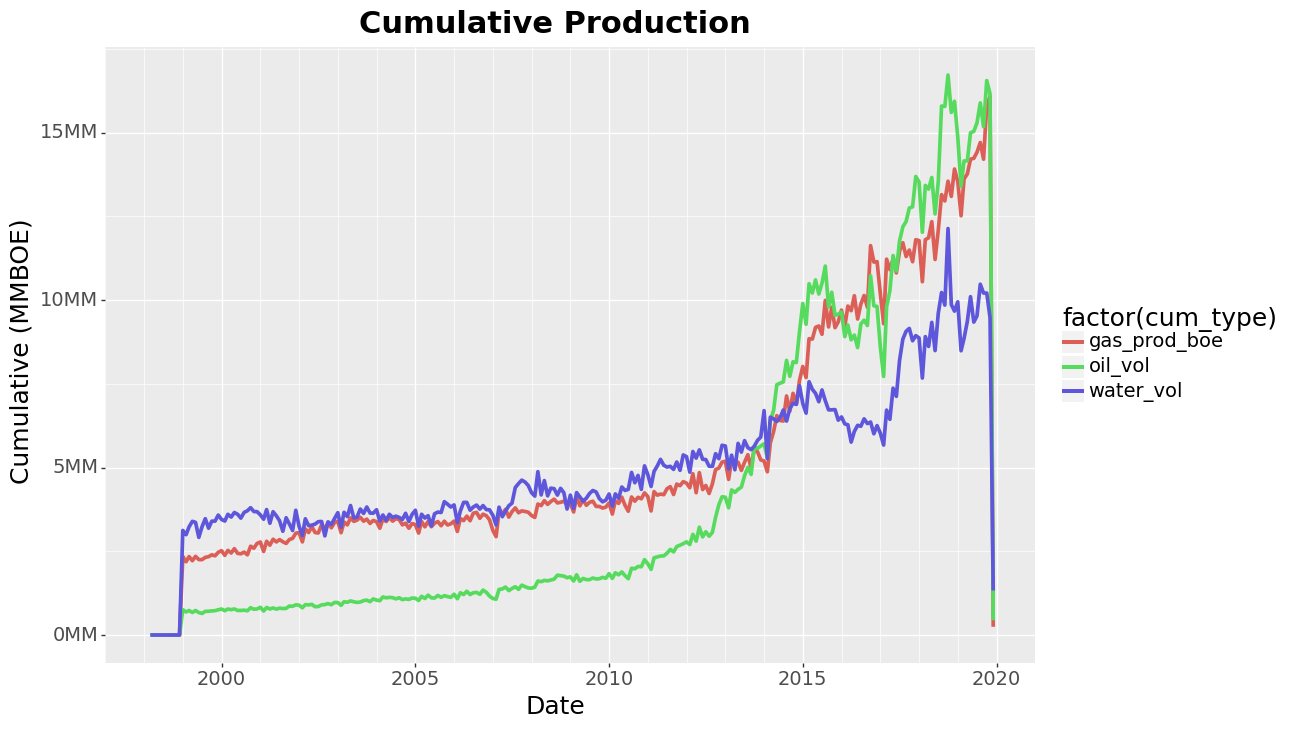

<ggplot: (8759803381133)>

In [0]:
# Generate time series data for all
import plotnine as plt9
plt9.options.figure_size = (12, 8)


ts_all = df.groupby(['Date'])['oil_vol', 'water_vol', 'gas_prod_boe'].sum().reset_index().melt(id_vars = ['Date'], var_name = 'cum_type', value_name = 'cum')
ts_all_nozeros = ts_all.loc[ts_all['cum']> 0]
ts_all_nozeros.head()

ggplot(ts_all_nozeros,aes(x = 'Date', y = 'cum', color = 'factor(cum_type)')) + geom_line(size=1.5) + ggtitle('Cumulative Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) +\
theme(legend_title = element_text(size=18)) + theme(legend_text = element_text(size=14)) + scale_x_datetime(name = 'Date', date_breaks = ('5 years'), date_minor_breaks=('1 year'), date_labels = ('%Y')) +\
scale_y_continuous(name='Cumulative (MMBOE)', labels = ["0MM","5MM","10MM","15MM"], breaks = [0,5000000,10000000,15000000])

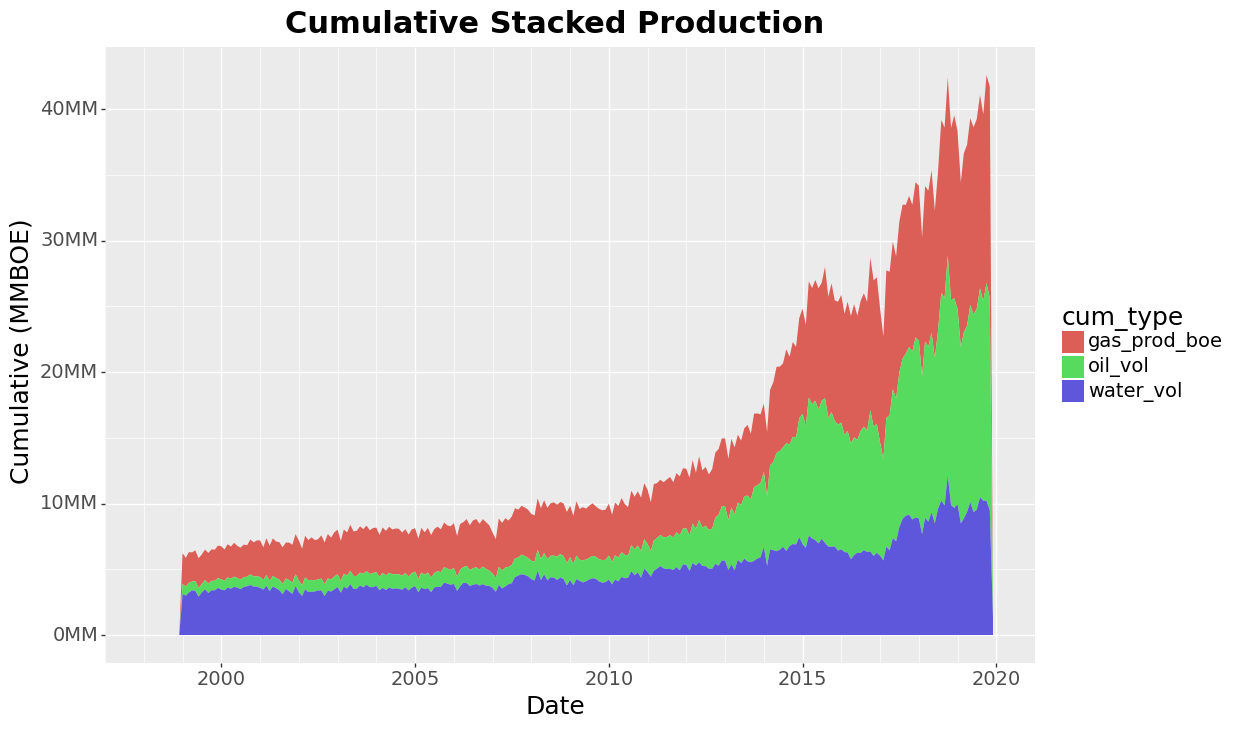

<ggplot: (-9223363297728326421)>

In [0]:
# ggplot(ts_all, aes(x = 'Date', y = 'cum', fill = 'cum_type')) + geom_area()

ggplot(ts_all_nozeros,aes(x = 'Date', y = 'cum', fill = 'cum_type')) + geom_area() + ggtitle('Cumulative Stacked Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) +\
theme(legend_title = element_text(size=18)) + theme(legend_text = element_text(size=14)) + scale_x_datetime(name = 'Date', date_breaks = ('5 years'), date_minor_breaks=('1 year'), date_labels = ('%Y')) +\
scale_y_continuous(name='Cumulative (MMBOE)', labels = ["0MM","10MM","20MM","30MM","40MM"], breaks = [0,10000000,20000000,30000000,40000000])

In [0]:
# Plot only verticals

vert_prod_series = df[df['well_type_cat'] != 'Horizontal']

# Generate time series data for all
ts_verticals = vert_prod_series.groupby(['Date'])['oil_vol', 'water_vol', 'gas_prod_boe'].sum().reset_index().melt(id_vars = ['Date'], var_name = 'cum_type', value_name = 'cum')
ts_verts_nozeros = ts_verticals.loc[ts_all['cum']> 0]
ts_verts_nozeros.head()

,Date,cum_type,cum
14,1998-03-01,oil_vol,1066.0
18,1998-07-01,oil_vol,55.0
19,1998-08-01,oil_vol,190.0
20,1998-09-01,oil_vol,52.0
23,1998-12-01,oil_vol,148.0


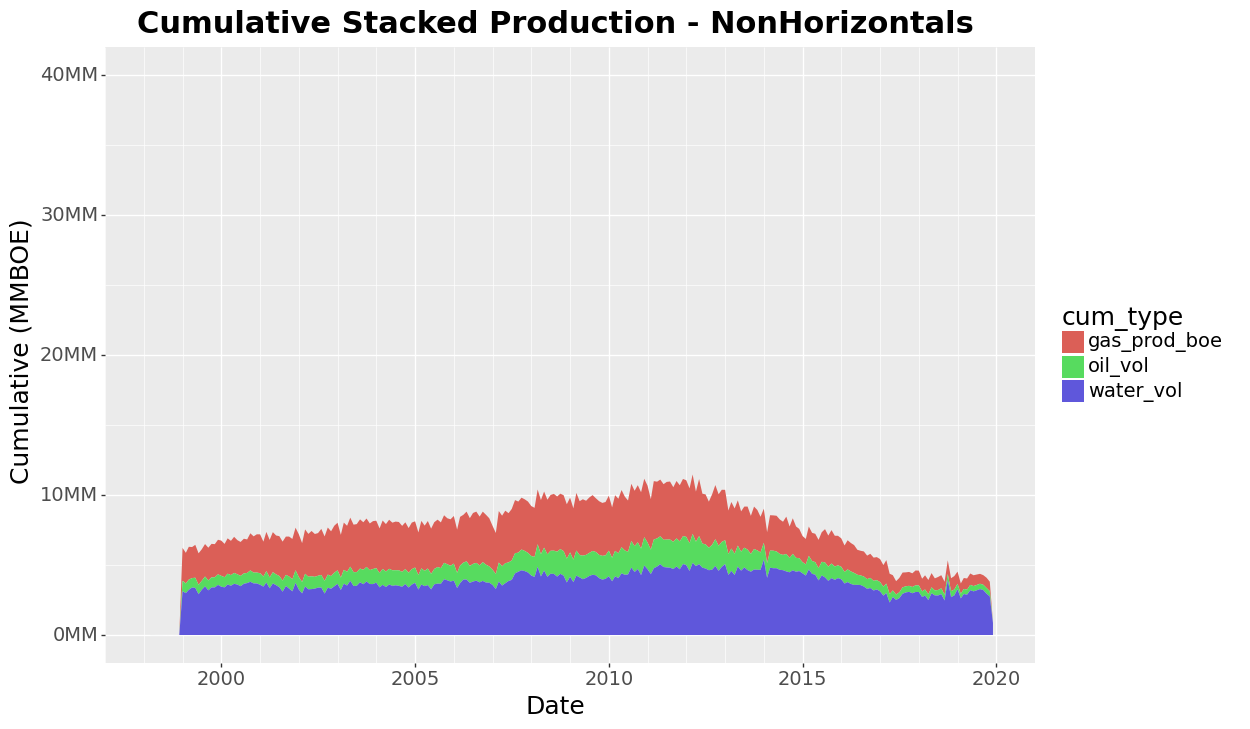

<ggplot: (-9223363297728322956)>

In [0]:
#ggplot(ts_verticals, aes(x = 'Date', y = 'cum', fill = 'cum_type')) + geom_area()

ggplot(ts_verts_nozeros,aes(x = 'Date', y = 'cum', fill = 'cum_type')) + geom_area() + ggtitle('Cumulative Stacked Production - NonHorizontals') +\
 theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) +\
theme(legend_title = element_text(size=18)) + theme(legend_text = element_text(size=14)) + scale_x_datetime(name = 'Date', date_breaks = ('5 years'), date_minor_breaks=('1 year'), date_labels = ('%Y')) +\
 scale_y_continuous(name='Cumulative (MMBOE)', labels = ["0MM","10MM","20MM","30MM","40MM"], breaks = [0,10000000,20000000,30000000,40000000], limits= (0,40000000))

In [0]:
# Plot vertical prod volumes by formation_category; 

limitvertfms = vert_prod_series[vert_prod_series['fm_code_realloc'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','DSND','SX-SN','DKTA'])]

# Generate time series data for all facet formation codes - Need to generate new aggregate
ts_verticals_fm_ltd = limitvertfms.groupby(['Date', 'fm_code_realloc'])['oil_vol', 'water_vol', 'gas_prod_boe'].sum().reset_index().melt(id_vars = ['Date', 'fm_code_realloc'], var_name = 'cum_type', value_name = 'cum')
ts_verts__fm_nozeros = ts_verticals_fm_ltd.loc[ts_verticals_fm_ltd['cum']> 0]
ts_verts__fm_nozeros.head()


,Date,fm_code_realloc,cum_type,cum
14,1998-03-01,DSND,oil_vol,1066.0
22,1998-07-01,DKTA,oil_vol,55.0
26,1998-08-01,JSND,oil_vol,190.0
28,1998-09-01,JSND,oil_vol,52.0
33,1998-12-01,CODL,oil_vol,84.0


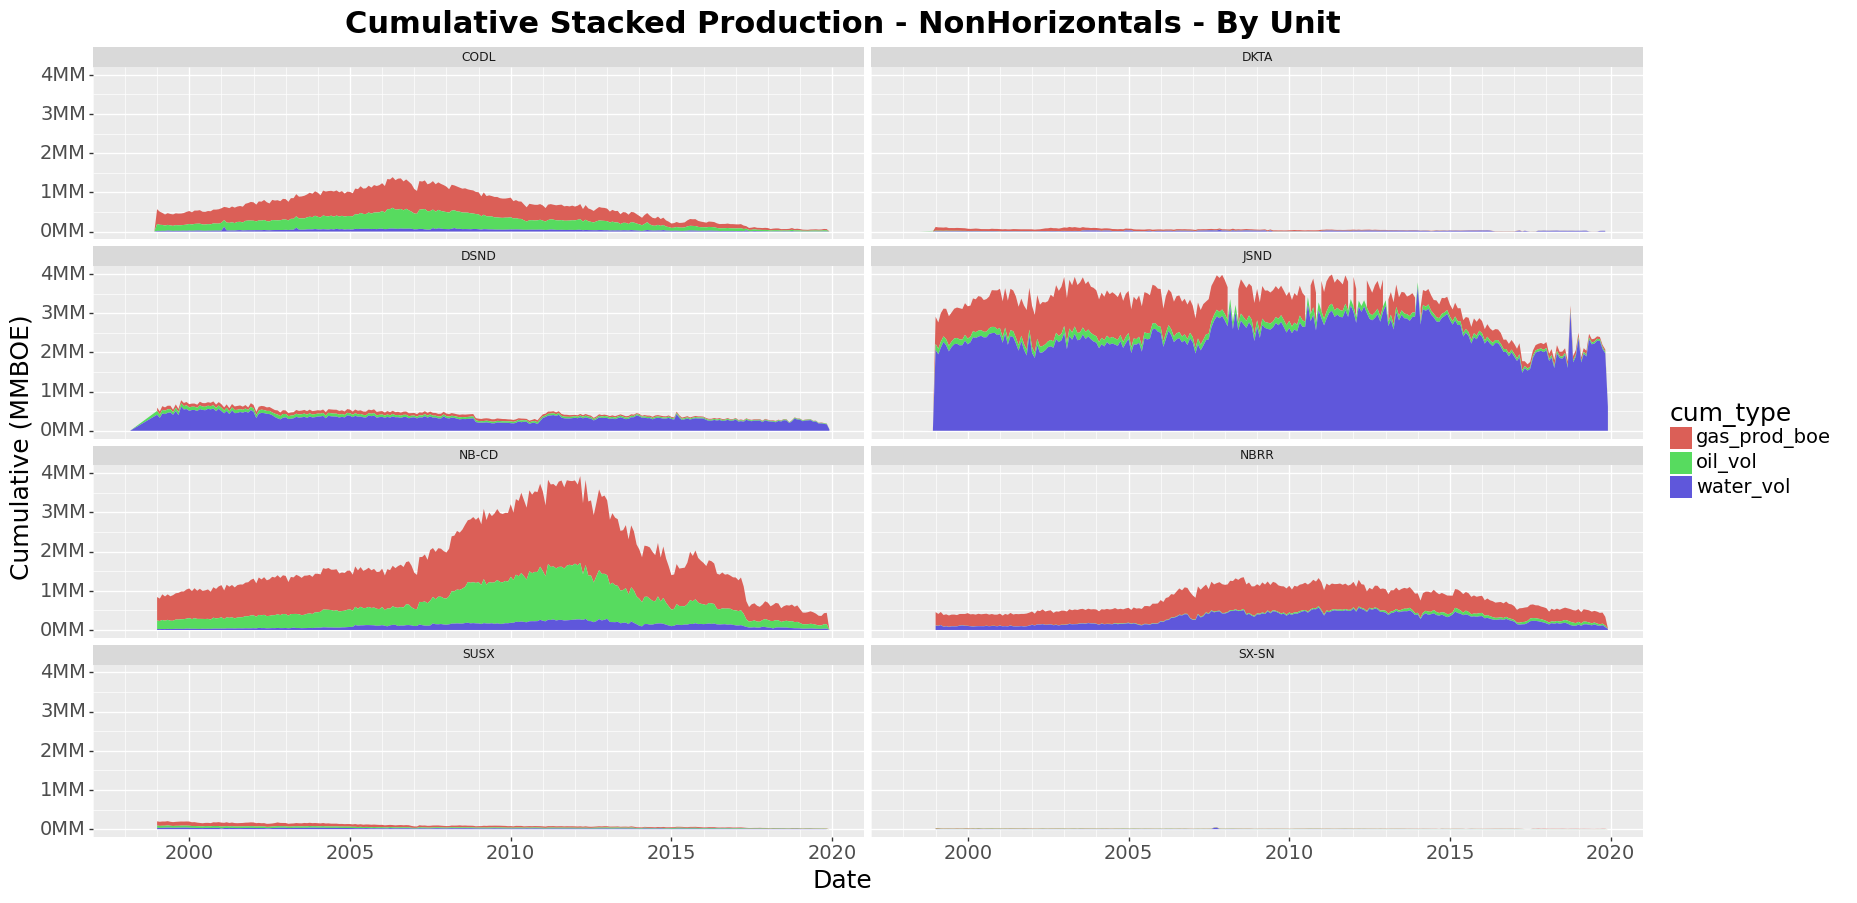

<ggplot: (-9223363297728447144)>

In [0]:
# Plot vert production by formation ['NB-CD','NBRR','CODL','JSND','SUSX','DSND','SX-SN','DKTA']

plt9.options.figure_size = (20, 10)
ggplot(ts_verts__fm_nozeros[ts_verts__fm_nozeros['fm_code_realloc'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','DSND','SX-SN','DKTA'])], aes(x = 'Date', y = 'cum', fill = 'cum_type')) +\
 geom_area() + ggtitle('Cumulative Stacked Production - NonHorizontals - By Unit') + facet_wrap('fm_code_realloc', nrow = 4, scales = 'fixed') + labs(y = "Cumulative (BOE)") +\
 theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) +\
theme(legend_title = element_text(size=18)) + theme(legend_text = element_text(size=14)) +\
 scale_x_datetime(name = 'Date', date_breaks = ('5 years'), date_minor_breaks=('1 year'), date_labels = ('%Y')) +\
 scale_y_continuous(name='Cumulative (MMBOE)', labels = ["0MM","1MM","2MM","3MM","4MM"], breaks = [0,1000000,2000000,3000000,4000000], limits= (0,4000000))

In [0]:
# Plot only horizontals

hor_prod_series = df[df['well_type_cat'] == 'Horizontal']

# Generate time series data for all 
ts_horizontals = hor_prod_series.groupby(['Date'])['oil_vol', 'water_vol', 'gas_prod_boe'].sum().reset_index().melt(id_vars = ['Date'], var_name = 'cum_type', value_name = 'cum')
ts_horizontals_nozeros = ts_horizontals.loc[ts_horizontals['cum']> 0]
ts_horizontals_nozeros.head()


,Date,cum_type,cum
0,1999-01-01,oil_vol,127.0
1,1999-02-01,oil_vol,133.0
2,1999-03-01,oil_vol,91.0
3,1999-04-01,oil_vol,86.0
4,1999-05-01,oil_vol,112.0


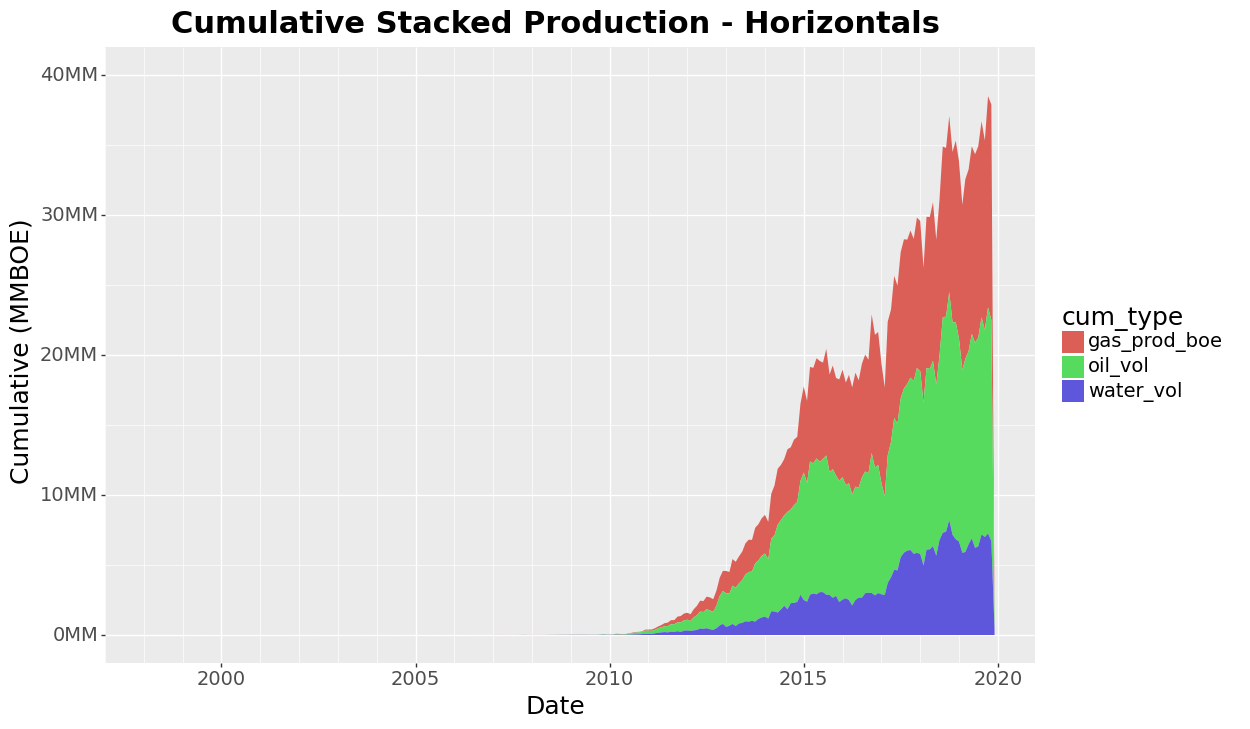

<ggplot: (-9223363297728601070)>

In [0]:
plt9.options.figure_size = (12, 8)

#ggplot(ts_horizontals, aes(x = 'Date', y = 'cum', fill = 'cum_type')) + geom_area()

ggplot(ts_horizontals_nozeros,aes(x = 'Date', y = 'cum', fill = 'cum_type')) + geom_area() + ggtitle('Cumulative Stacked Production - Horizontals') +\
 theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) +\
theme(legend_title = element_text(size=18)) + theme(legend_text = element_text(size=14)) +\
scale_x_datetime(name = 'Date', date_breaks = ('5 years'), date_minor_breaks=('1 year'), date_labels = ('%Y')) +\
 scale_y_continuous(name='Cumulative (MMBOE)', labels = ["0MM","10MM","20MM","30MM","40MM"], breaks = [0,10000000,20000000,30000000,40000000], limits= (0,40000000))

In [0]:
# Plot horizontal prod volumes by formation_category; 

limithorfms = hor_prod_series[hor_prod_series['fm_code_realloc'].isin(['NBRR','CODL','CD-FH','NBFHC','CLCDFH','NRCC','CD-CRL'])]

# Generate time series data for all facet formation codes - Need to generate new aggregate

ts_horizontals_fm_ltd = limithorfms.groupby(['Date', 'fm_code_realloc'])['oil_vol', 'water_vol', 'gas_prod_boe'].sum().reset_index().melt(id_vars = ['Date', 'fm_code_realloc'], var_name = 'cum_type', value_name = 'cum')
ts_horizontals_fm_nozeros = ts_horizontals_fm_ltd.loc[ts_horizontals_fm_ltd['cum']> 0]
ts_horizontals_fm_nozeros.head()

,Date,fm_code_realloc,cum_type,cum
0,1999-01-01,CODL,oil_vol,60.0
1,1999-01-01,NBRR,oil_vol,12.0
2,1999-02-01,CODL,oil_vol,49.0
3,1999-02-01,NBRR,oil_vol,3.0
4,1999-03-01,NBRR,oil_vol,5.0


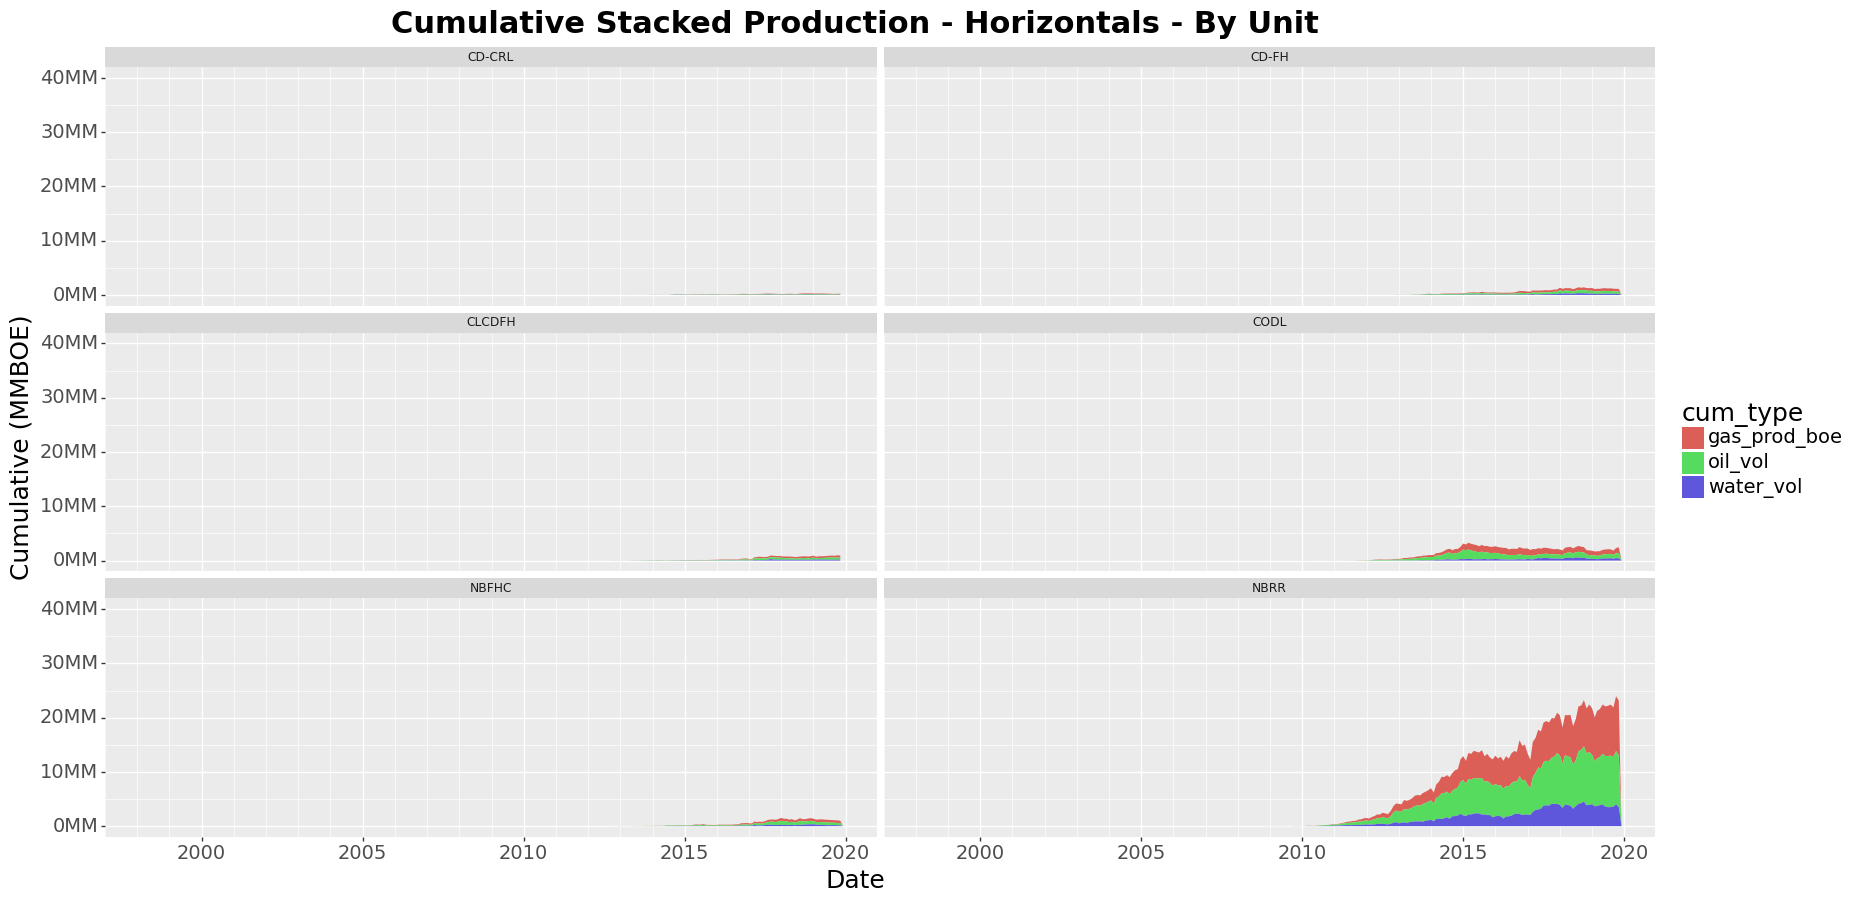

<ggplot: (-9223363297728271819)>

In [0]:
# Plot horizontal production by formation ['NBRR','CODL','CD-FH','NBFHC','CLCDFH','NRCC','CD-CRL']
# ggplot(ts_horizontals_fm_ltd[ts_horizontals_fm_ltd['fm_code_realloc'].isin(['NBRR','CODL','CD-FH','NBFHC','CLCDFH','NRCC','CD-CRL'])], aes(x = 'Date', y = 'cum', fill = 'cum_type')) +\
# geom_area()  + facet_wrap('fm_code_realloc', nrow = 4, scales = 'free')

plt9.options.figure_size = (20, 10)
ggplot(ts_horizontals_fm_nozeros[ts_horizontals_fm_nozeros['fm_code_realloc'].isin(['NBRR','CODL','CD-FH','NBFHC','CLCDFH','NRCC','CD-CRL'])], aes(x = 'Date', y = 'cum', fill = 'cum_type')) +\
 geom_area() + ggtitle('Cumulative Stacked Production - Horizontals - By Unit') + facet_wrap('fm_code_realloc', nrow = 3, scales = 'fixed') + labs(y = "Cumulative (BOE)") +\
  theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) +\
theme(legend_title = element_text(size=18)) + theme(legend_text = element_text(size=14)) +\
scale_x_datetime(name = 'Date', date_breaks = ('5 years'), date_minor_breaks=('1 year'), date_labels = ('%Y')) +\
 scale_y_continuous(name='Cumulative (MMBOE)', labels = ["0MM","10MM","20MM","30MM","40MM"], breaks = [0,10000000,20000000,30000000,40000000], limits= (0,40000000))


In [0]:
# Contrast production in hors and non-hors by formation; 

# First calculate an additional column to re-categorize well_type_cat into hor and non-hor

#def well_type_cat2(c):
#  if c['well_type_cat'] == 'Horizontal':
#    return 'Horizontal'
#  else:
#    return 'Non-Horizontal'

#df['well_type_cat2'] = df.apply(well_type_cat2, axis = 1)
#df['well_type_cat2'] = df['well_type_cat2'].astype('category')

ts_agg = df.groupby(['Date', 'fm_code_realloc', 'well_type_cat2'])['oil_vol', 'water_vol', 'gas_prod_boe'].sum().reset_index().melt(id_vars = ['Date', 'fm_code_realloc', 'well_type_cat2'], var_name = 'cum_type', value_name = 'cum')
ts_agg = ts_agg[~ts_agg['cum'].isnull()]

ts_agg_limitfms = ts_agg[ts_agg['fm_code_realloc'].isin(['CODL', 'NBRR', 'NB-CD'])]
ts_agg_limitfm_nozeros = ts_agg_limitfms.loc[ts_agg_limitfms['cum']> 0]
ts_agg_limitfm_nozeros.head()


,Date,fm_code_realloc,well_type_cat2,cum_type,cum
4255,1998-12-01,CODL,Non-Horizontal,oil_vol,84.0
4438,1999-01-01,CODL,Horizontal,oil_vol,60.0
4439,1999-01-01,CODL,Non-Horizontal,oil_vol,176047.0
4532,1999-01-01,NB-CD,Horizontal,oil_vol,43.0
4533,1999-01-01,NB-CD,Non-Horizontal,oil_vol,213910.0


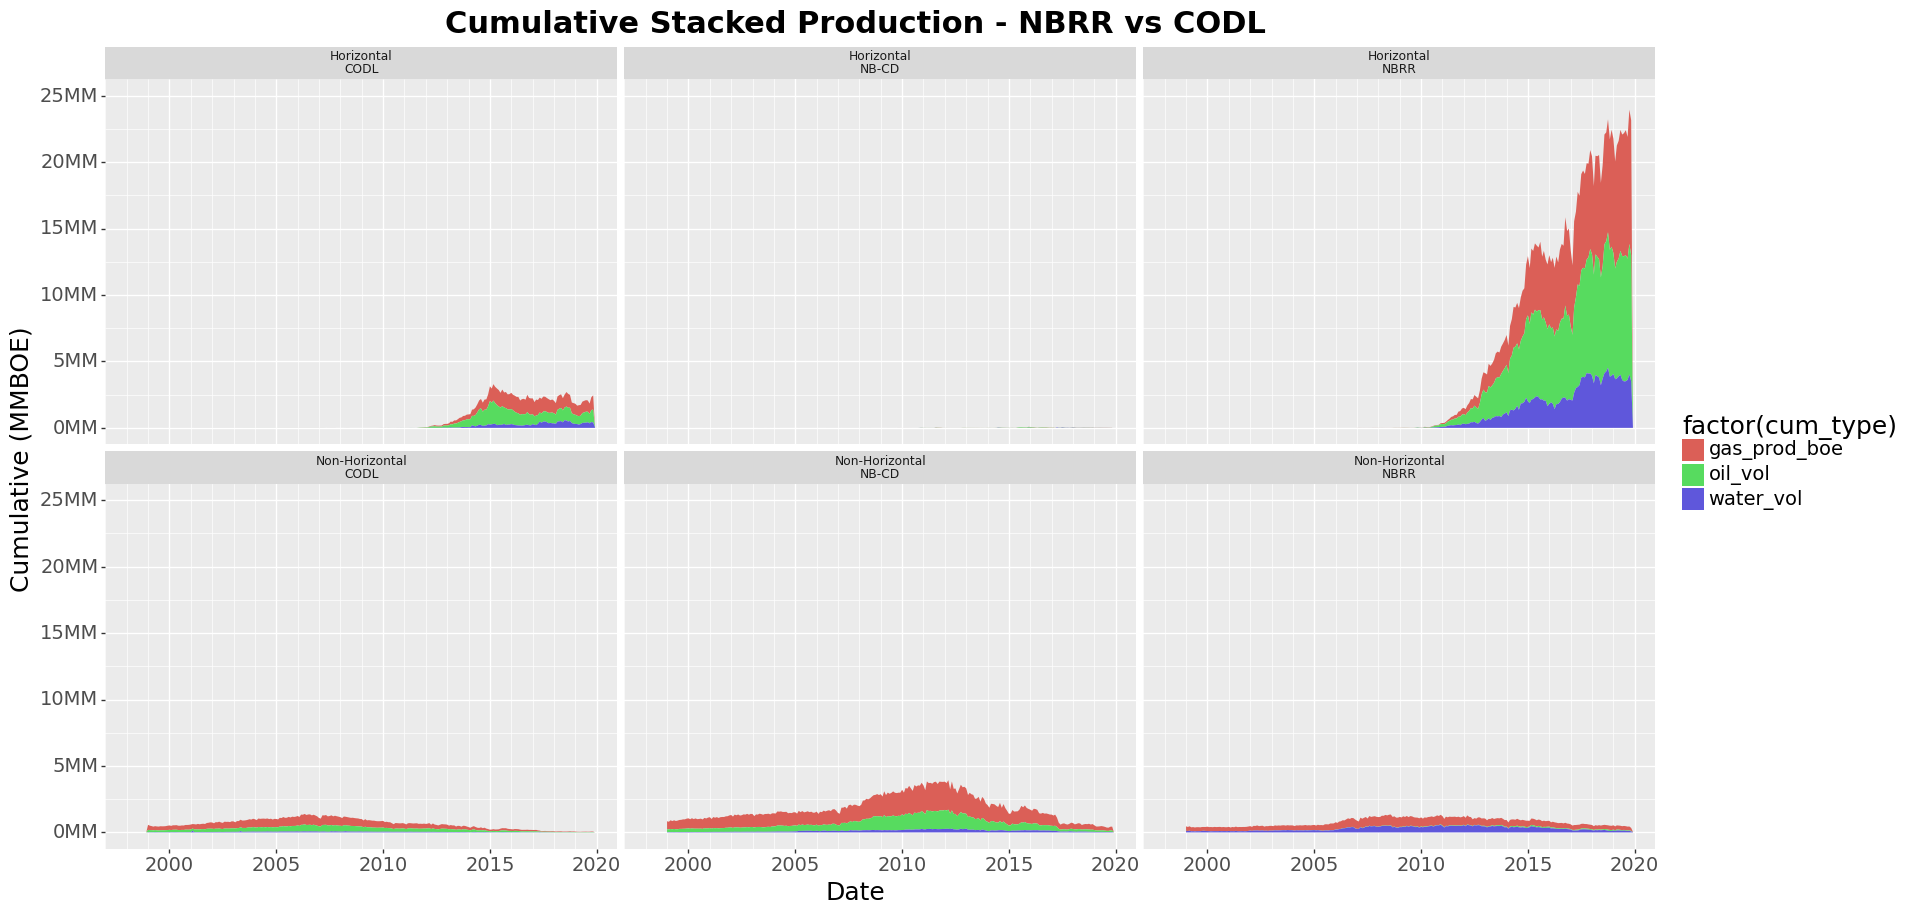

<ggplot: (8747108094184)>

In [0]:

plt9.options.figure_size = (20, 10)

ggplot(ts_agg_limitfm_nozeros, aes(x = 'Date', y = 'cum', fill = 'factor(cum_type)')) + geom_area() + ggtitle('Cumulative Stacked Production - NBRR vs CODL') + facet_wrap('~ well_type_cat2 + fm_code_realloc', scales = 'fixed') + labs(y = "Cumulative (BOE)") +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) +\
theme(legend_title = element_text(size=18)) + theme(legend_text = element_text(size=14)) +\
scale_x_datetime(name = 'Date', date_breaks = ('5 years'), date_minor_breaks=('1 year'), date_labels = ('%Y')) +\
 scale_y_continuous(name='Cumulative (MMBOE)', labels = ["0MM","5MM","10MM","15MM","20MM","25MM"], breaks = [0,5000000,10000000,15000000,20000000,25000000], limits= (0,25000000))



In [53]:
# Plot production by quintile and prod month for NBRR horizontals

ts_NBRR_quintile5 = df[df['NBRR_Hor_IP_Quintile'] == '5']
#ts_NBRR_quintile5.tail(30)

ts_NBRR_quintile_agg = ts_NBRR_quintile5.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
ts_NBRR_quintile_agg.head()

#ts_NBRR_quintile_avg = ts_NBRR_quintile5.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
#ts_NBRR_quintile_avg.head()


,API,prod_month_by_API_Form,oil_gas_vol_boe,Date,API8,sidetrack_num,well_type_cat,Oper_Cur_Num,Oper_Cur_Name,Oper_Hist_Num,Oper_Hist_Name,Well_Title,Ground_Ele,Max_MD,MD,Max_TVD,TVD,TVDSS,Field_Code,Field_Name,Spud_Date,Stat_Date,well_status,Facil_Stat,API_Form,formation_code,fm_code_realloc,prod_days,water_vol,oil_vol,gas_prod,gas_prod_boe,LAT_SF,LONG_SF,LAT_BH,LONG_BH,UTM_X_SF,UTM_Y_SF,UTM_X_BH,UTM_Y_BH,...,water_press_csg,bom_invent,adjustment,eom_invent,gravity_sale,gas_vol,shrink,gas_press_tbg,gas_press_csg,facility_name,facility_num,accepted_date,revised,year,month,api_seq_num,API_Label_x,Well_Num,Well_Name,Citing_Typ,Facil_Id,Facil_Type,Loc_Qual,Loc_ID,Loc_Name,Dist_N_S,Dir_N_S,Dist_E_W,Dir_E_W,Qtr_Qtr,Meridian,BH_Status,geometry_SF,geometry_BH,ProdHist,NBRR_Hor_IP_Quintile,NBRR_Hor_NormBoeCum_Quintile,CODL_Hor_IP_Quintile,CODL_Hor_NormBoeCum_Quintile,well_type_cat2
0,10986000,1.0,1900.068966,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
1,10986000,2.0,10318.551724,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2,10986000,3.0,20122.620690,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
3,10986000,4.0,20505.482759,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
4,10986000,5.0,23413.517241,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1


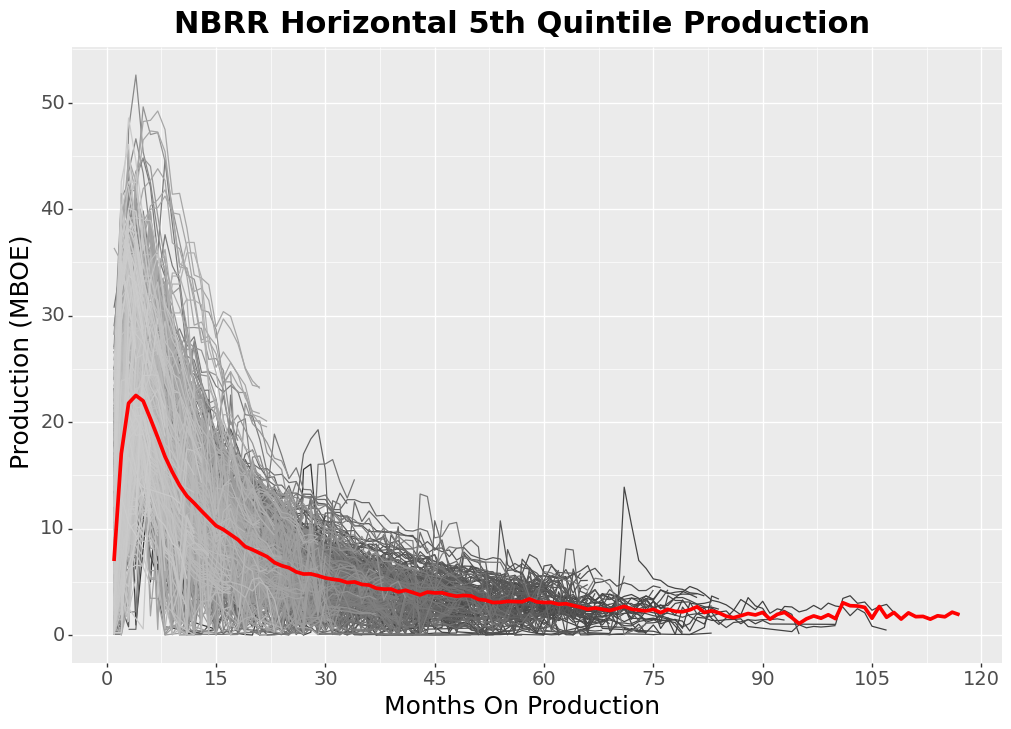

<ggplot: (8771032111473)>

In [40]:
import plotnine as plt9
plt9.options.figure_size = (12, 8)

ggplot(ts_NBRR_quintile_agg,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(data=ts_NBRR_quintile_avg, color = 'red', size = 1.5) +\
ggtitle('NBRR Horizontal 5th Quintile Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000])  + scale_color_gray()

In [35]:

ts_NBRR_quintile4 = df[df['NBRR_Hor_IP_Quintile'] == '4']
#ts_NBRR_quintile4.tail(30)

ts_NBRR_quintile_agg4 = ts_NBRR_quintile4.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
#ts_NBRR_quintile_agg4.head()

ts_NBRR_quintile_avg4 = ts_NBRR_quintile4.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
ts_NBRR_quintile_avg4.head()

,prod_month_by_API_Form,oil_gas_vol_boe
0,1.0,5224.383534
1,2.0,12011.080608
2,3.0,14474.960459
3,4.0,14269.985469
4,5.0,14135.473868


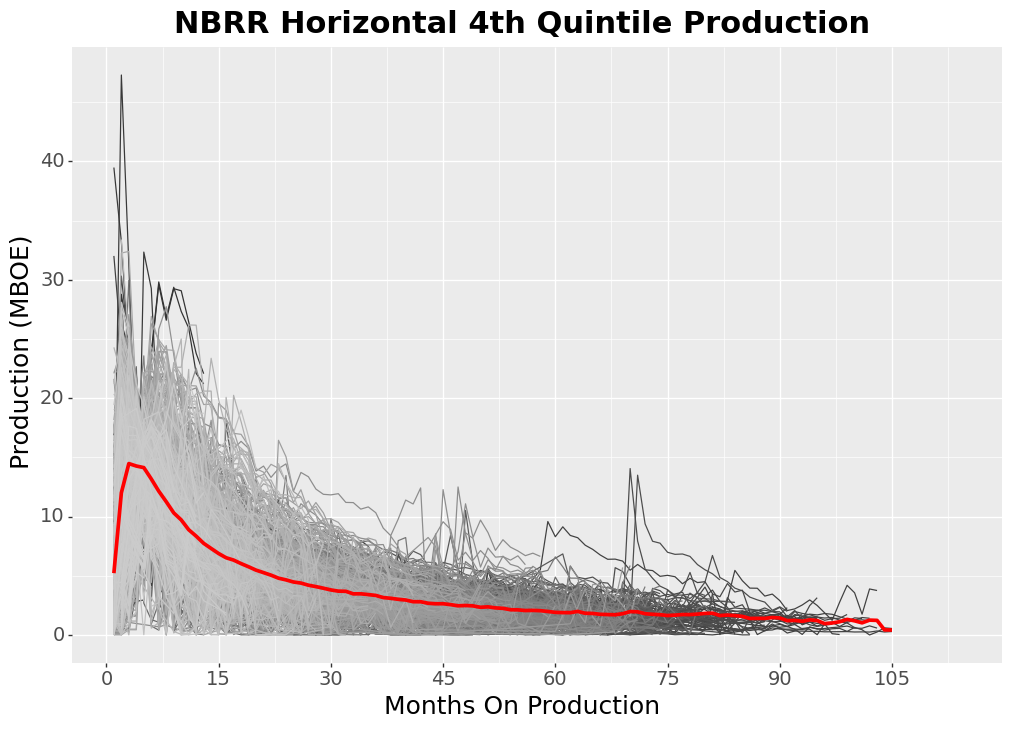

<ggplot: (8771031826731)>

In [41]:
ggplot(ts_NBRR_quintile_agg4,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(data=ts_NBRR_quintile_avg4, color = 'red', size = 1.5) +\
ggtitle('NBRR Horizontal 4th Quintile Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000]) + scale_color_gray()

In [48]:
ts_NBRR_quintile3 = df[df['NBRR_Hor_IP_Quintile'] == '3']
#ts_NBRR_quintile3.tail(30)

ts_NBRR_quintile_agg3 = ts_NBRR_quintile3.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
#ts_NBRR_quintile_agg3.head()

ts_NBRR_quintile_avg3 = ts_NBRR_quintile3.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
ts_NBRR_quintile_avg3.head()

,prod_month_by_API_Form,oil_gas_vol_boe
0,1.0,5230.659241
1,2.0,11335.780126
2,3.0,12257.206763
3,4.0,10983.317044
4,5.0,10179.040545


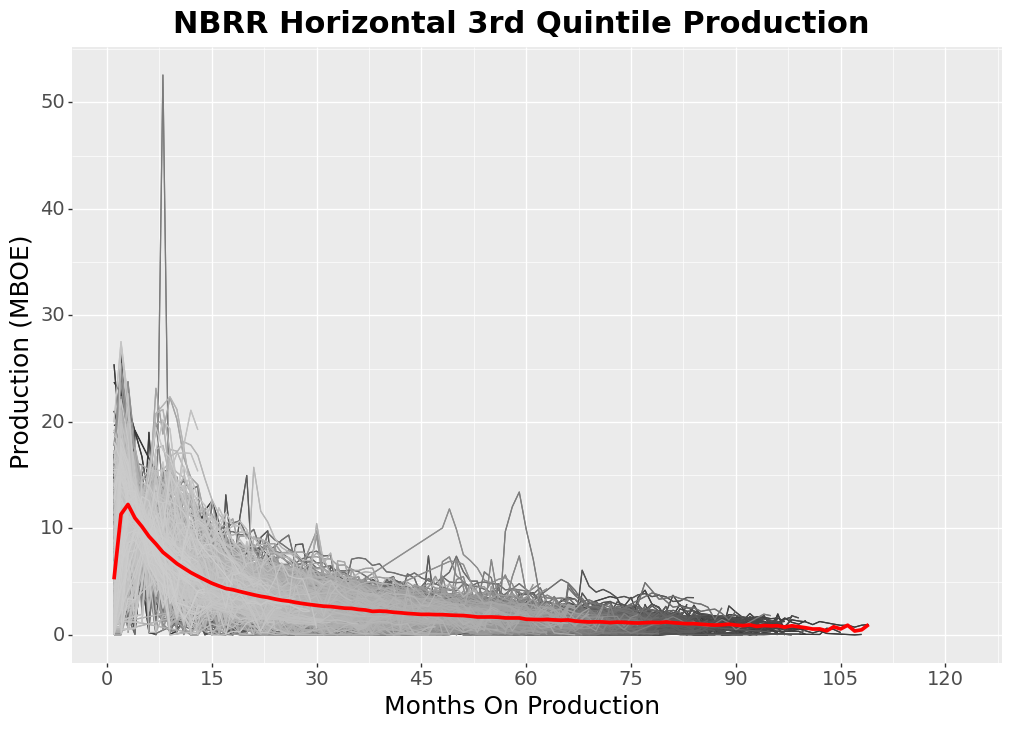

<ggplot: (-9223363265823338531)>

In [50]:
ggplot(ts_NBRR_quintile_agg3,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(size=0.5) + geom_line(data=ts_NBRR_quintile_avg3, color = 'red', size = 1.5) +\
ggtitle('NBRR Horizontal 3rd Quintile Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000]) + scale_color_gray()

In [57]:
ts_NBRR_quintile2 = df[df['NBRR_Hor_IP_Quintile'] == '2']
#ts_NBRR_quintile2.tail(30)

ts_NBRR_quintile_agg2 = ts_NBRR_quintile2.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
#ts_NBRR_quintile_agg2.head()

ts_NBRR_quintile_avg2 = ts_NBRR_quintile2.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
ts_NBRR_quintile_avg2.head()

,prod_month_by_API_Form,oil_gas_vol_boe
0,1.0,5306.026880
1,2.0,10021.415760
2,3.0,9628.604831
3,4.0,8128.081229
4,5.0,7095.997102


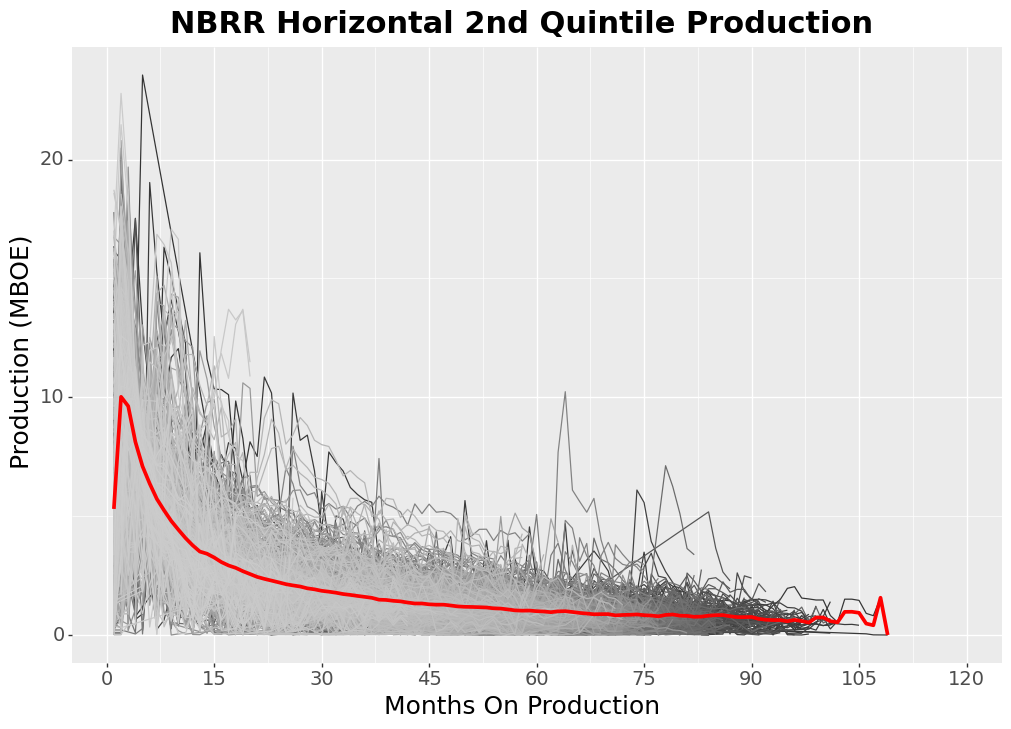

<ggplot: (8771032065456)>

In [56]:
ggplot(ts_NBRR_quintile_agg2,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(data=ts_NBRR_quintile_avg2, color = 'red', size = 1.5) +\
ggtitle('NBRR Horizontal 2nd Quintile Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000]) + scale_color_gray()

In [59]:
ts_NBRR_quintile1 = df[df['NBRR_Hor_IP_Quintile'] == '1']
#ts_NBRR_quintile1.tail(30)

ts_NBRR_quintile_agg1 = ts_NBRR_quintile1.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
#ts_NBRR_quintile_agg1.head()

ts_NBRR_quintile_avg1 = ts_NBRR_quintile1.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
ts_NBRR_quintile_avg1.head()

,prod_month_by_API_Form,oil_gas_vol_boe
0,1.0,4286.277307
1,2.0,6888.967058
2,3.0,5807.880912
3,4.0,4461.807605
4,5.0,3677.217303


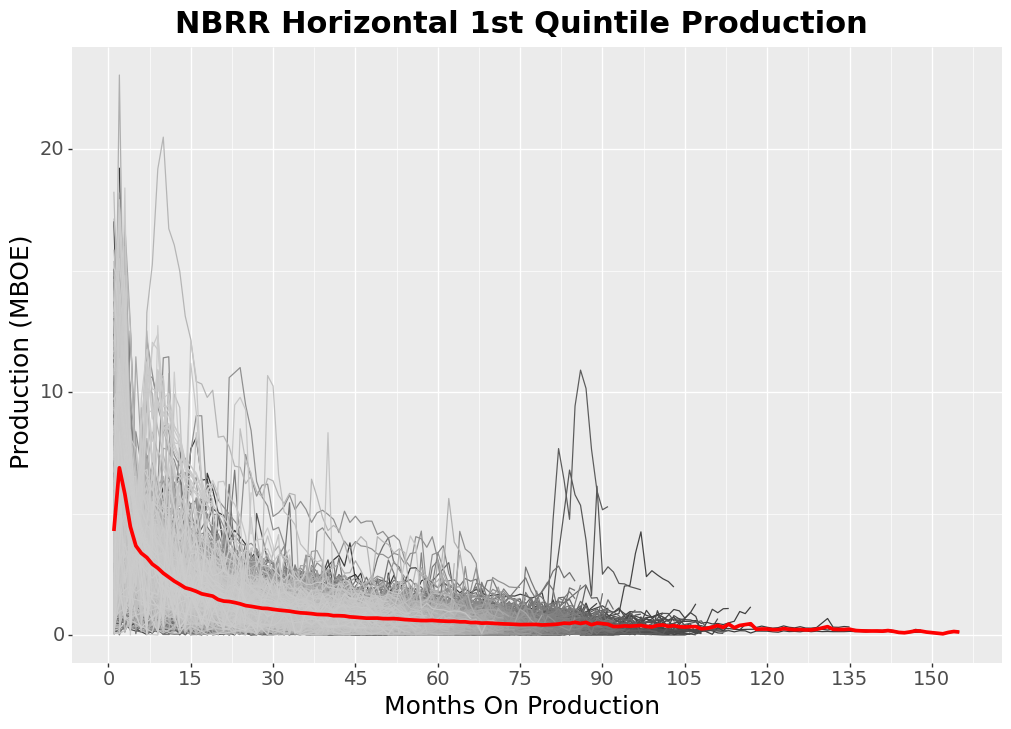

<ggplot: (8771031920367)>

In [60]:
ggplot(ts_NBRR_quintile_agg1,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(data=ts_NBRR_quintile_avg1, color = 'red', size = 1.5) +\
ggtitle('NBRR Horizontal 1st Quintile Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000])  + scale_color_gray()

In [0]:
# Plot production by quintile and prod month for NBRR / CODL horizontals - kept crashing when trying to do this
# First need to calculate oil vol + gas_prod_boe

#ts_NBRR_quintile = df[df['NBRR_Hor_IP_Quintile'].isin(['1','2','3','4','5'])]
#ts_NBRR_quintile.tail(30)

ts_NBRR_quintile_agg = ts_NBRR_quintile.groupby(['API','NBRR_Hor_IP_Quintile','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
ts_NBRR_quintile_agg.head()

In [61]:
# Plot production by quintile and prod month CODL horizontals

ts_CODL_quintile5 = df[df['CODL_Hor_IP_Quintile'] == '5']
#ts_CODL_quintile5.tail(30)

ts_CODL_quintile_agg5 = ts_CODL_quintile5.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
#ts_CODL_quintile_agg.head()

ts_CODL_quintile_avg5 = ts_CODL_quintile5.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
ts_CODL_quintile_avg5.head()

,prod_month_by_API_Form,oil_gas_vol_boe
0,1.0,6925.822468
1,2.0,15002.193150
2,3.0,18194.219857
3,4.0,18389.218005
4,5.0,17803.600534


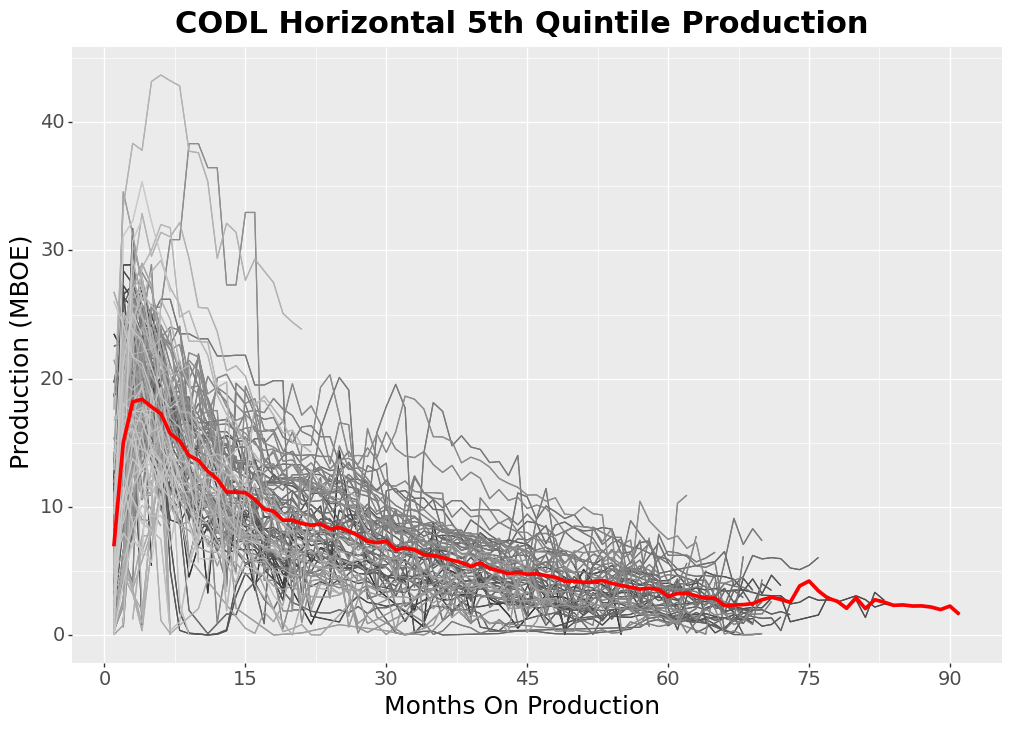

<ggplot: (8771031824262)>

In [64]:
ggplot(ts_CODL_quintile_agg,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(size=0.5) + geom_line(data=ts_CODL_quintile_avg5, color = 'red', size = 1.5) +\
ggtitle('CODL Horizontal 5th Quintile Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000]) + scale_color_gray()


In [66]:
# Plot production by quintile and prod month CODL horizontals

ts_CODL_quintile1 = df[df['CODL_Hor_IP_Quintile'] == '1']
#ts_CODL_quintile5.tail(30)

ts_CODL_quintile_agg1 = ts_CODL_quintile1.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
#ts_CODL_quintile_agg1.head()

ts_CODL_quintile_avg1 = ts_CODL_quintile1.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
ts_CODL_quintile_avg1.head()

,prod_month_by_API_Form,oil_gas_vol_boe
0,1.0,3297.134748
1,2.0,5064.487373
2,3.0,4082.167800
3,4.0,3368.925247
4,5.0,3049.831472


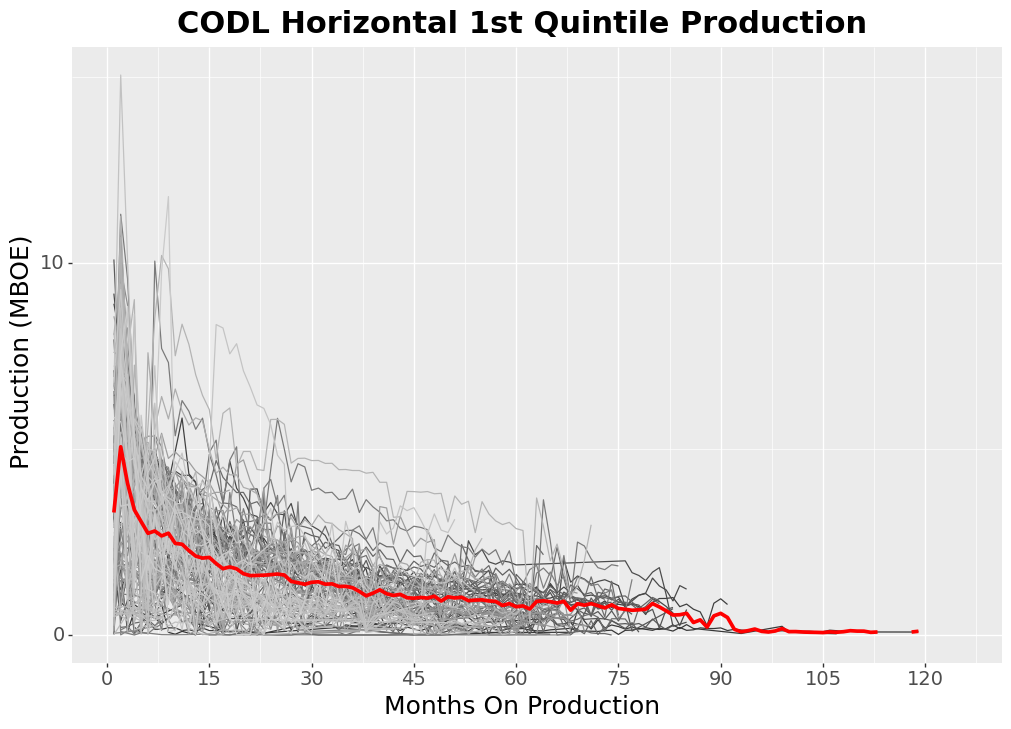

<ggplot: (8771031893480)>

In [69]:
ggplot(ts_CODL_quintile_agg1,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(data=ts_CODL_quintile_avg1, color = 'red', size = 1.5) +\
ggtitle('CODL Horizontal 1st Quintile Production') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000])  + scale_color_gray()

# For log y scale
#scale_y_log10(name="Production (MBOE)", labels = ["1","10","100","1000","10000","100000"], breaks = [1,10,100,1000,10000,100000])

In [79]:
# Plot production of NBRR horizontal wells with ab val of 1

#ts_NBRR_ABVAL1 = df[(df_mrg['NBRR_Hor_IP_Quintile'].isin(["1","2","3","4","5"])) & (df['Ab_Val'] == 1)]
#ts_NBRR_ABVAL1.tail(30)

#ts_NBRR_ABVAL1_agg = ts_NBRR_ABVAL1.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
#ts_NBRR_ABVAL1_agg.head()

ts_NBRR_ABVAL1_avg = ts_NBRR_ABVAL1_agg.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
ts_NBRR_ABVAL1_avg.head()

,prod_month_by_API_Form,oil_gas_vol_boe
0,1.0,5203.093936
1,2.0,8457.748276
2,3.0,7333.989224
3,4.0,6227.836714
4,5.0,5648.637438


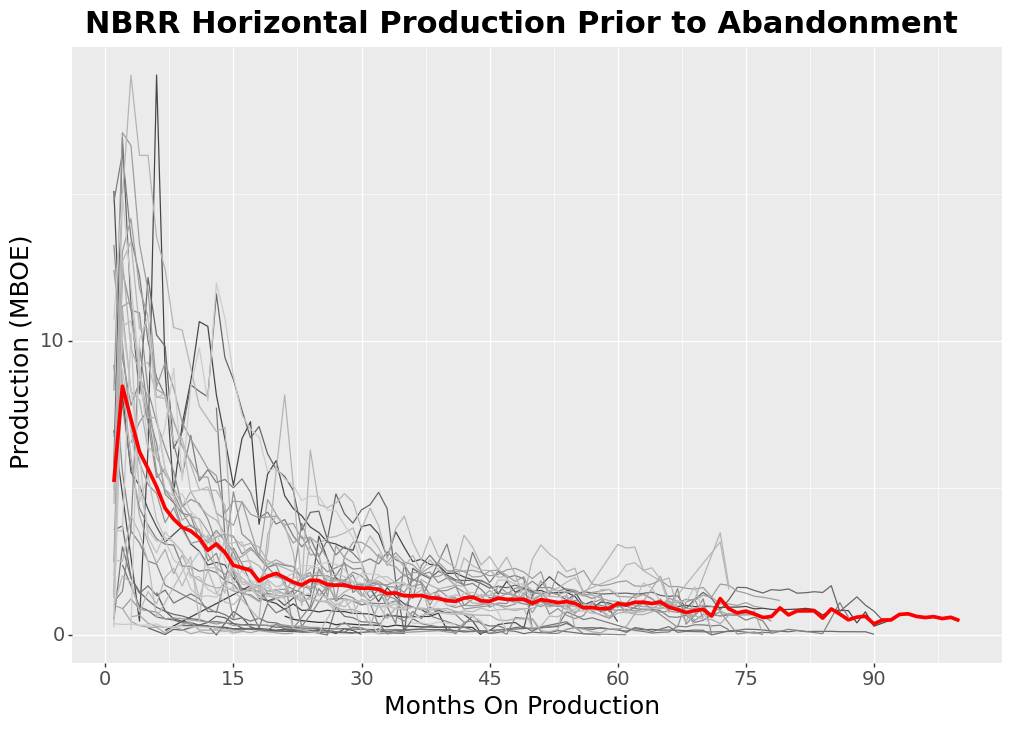

<ggplot: (8771032054753)>

In [81]:
ggplot(ts_NBRR_ABVAL1_agg,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(data=ts_NBRR_ABVAL1_avg, color = 'red', size = 1.5) +\
ggtitle('NBRR Horizontal Production Prior to Abandonment') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000])  + scale_color_gray()

In [84]:
# Plot production of CODL horizontal wells with ab val of 1

#ts_CODL_ABVAL1 = df[(df['CODL_Hor_IP_Quintile'].isin(["1","2","3","4","5"])) & (df['Ab_Val'] == 1)]
#ts_CODL_ABVAL1.tail(30)

#ts_CODL_ABVAL1_agg = ts_CODL_ABVAL1.groupby(['API','prod_month_by_API_Form','oil_gas_vol_boe']).count().reset_index()
#ts_CODL_ABVAL1_agg.head()

ts_CODL_ABVAL1_avg = ts_CODL_ABVAL1_agg.groupby(['prod_month_by_API_Form'])['oil_gas_vol_boe'].mean().reset_index()
ts_CODL_ABVAL1_avg.head()

,prod_month_by_API_Form,oil_gas_vol_boe
0,1.0,4231.252874
1,2.0,7858.873563
2,3.0,6776.632184
3,4.0,4707.528736
4,5.0,3324.735632


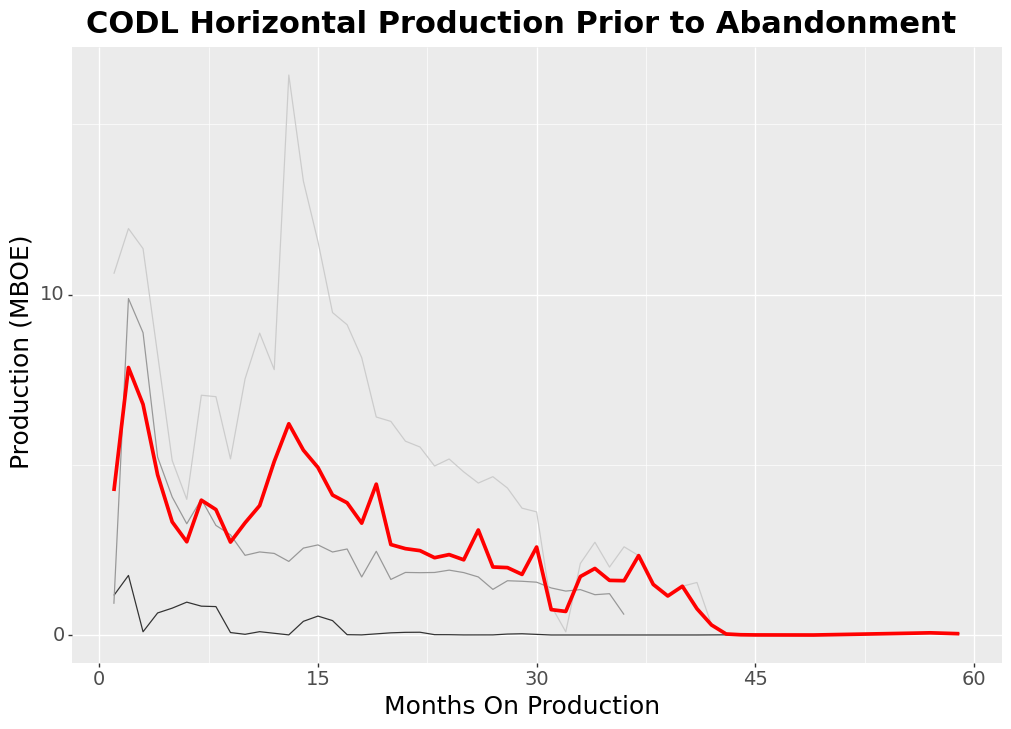

<ggplot: (8771031682736)>

In [85]:
ggplot(ts_CODL_ABVAL1_agg,aes(x = 'prod_month_by_API_Form', y = 'oil_gas_vol_boe', color = 'factor(API)')) + geom_line(size=0.5) + geom_line(data=ts_CODL_ABVAL1_avg, color = 'red', size = 1.5) +\
ggtitle('CODL Horizontal Production Prior to Abandonment') +\
theme(axis_title = element_text(size=18)) + theme(axis_text = element_text(size=14)) + theme(plot_title = element_text(size=22, face='bold')) + theme(legend_position = "none") +\
scale_x_continuous(name = "Months On Production", labels = ["0","15","30","45","60","75","90","105","120","135","150"], breaks = [0,15,30,45,60,75,90,105,120,135,150]) +\
scale_y_continuous(name="Production (MBOE)", labels = ["0","10","20","30","40","50"], breaks = [0,10000,20000,30000,40000,50000])  + scale_color_gray()